# Project: **Data Jobs Salaries in Mexico in July 2022**
___
___
## **2. Data Wrangling**
___

Author: **Daniel Eduardo López**

GitHub: **_https://github.com/DanielEduardoLopez_**

Email: **_daniel-eduardo-lopez@outlook.com_**
___

The purpose of the present notebook is to perform the process of **data cleaning and wrangling** in order to enable the analysis and visualization of the job data collected through web scraping.

To do so, first, the data was load to a Pandas dataframe. Then, the data was explored with the Pandas and Seaborn libraries to gain some understanding and preliminary insights as well as defining some wrangling strategies to effectively clean the data.

Finally, the data was cleaned with Pandas. Some of the procedures applied to the data were:
- Drop of duplicates
- Drop of null values
- Harmonization of terms
- Trimming and cleaning of values
- Slicing of observations
- Split of columns


### **1. Data loading and Exploration**
___

In [620]:
# Libraries importation
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [621]:
mpl.style.use('ggplot') # For a ggplot-like plotting style

In [622]:
# Data importation
df_base = pd.read_csv('DataSet_Raw.csv')
df_base.head(10)

,Job,Salary,Company,Location
0,Analista de datos,"$47,000 - $53,000 Mensual",P3 IMPULSORES ESTRATEGICOS,CDMX
1,Analista de Datos,"$35,000 Mensual",Corporativo Mek de México,Ciudad de México
2,Analista de datos,NaN,FIDELITY MARKETING S.A DE C.V,CDMX
3,Analista de datos,"$13,000 - $13,300 Mensual",Universidad Tecnológica de México,Ciudad de México
4,Analista de Datos,NaN,Laboratorios Médicos del Chopo,CDMX
5,ANALISTA DE DATOS,"$8,500 - $9,000 Mensual",Conduent de México SA de CV,Chih.
6,Analista de datos,NaN,Banamex,CDMX
7,Analista de Datos,"$7,500 - $8,500 Mensual",Grupo Comercial Control,Edo. Méx.​
8,Analista de datos,"$7,000 - $8,000 Mensual","Ediciones Larousse, S.A. de C.V.",CDMX
9,ANALISTA DE DATOS,"$12,000 Mensual",Auto Líneas América,Gto.


In [623]:
df_base.tail(10)

,Job,Salary,Company,Location
1269,VACANTEPAM - AB Initio Technical Leader,NaN,Banamex,Ciudad de México
1270,PAM Vacante IT Project Senior Analyst - C12,NaN,Banamex,Ciudad de México
1271,Tech Owner Content Management,NaN,Banamex,Ciudad de México
1272,Compl Product Sr Analyst,NaN,Banamex,Ciudad de México
1273,Testing Sr Analyst,NaN,Banamex,Ciudad de México
1274,Tech Lead CX Digital Wealth,NaN,Banamex,Ciudad de México
1275,Strategy Lead Analyst,NaN,Banamex,Ciudad de México
1276,Vacante PAM - Tech Lead & Tech Owner,NaN,Banamex,Ciudad de México
1277,ComplAML KYC Analyst 2,NaN,Banamex,Ciudad de México
1278,Compl AML KYC Analyst 2,NaN,Banamex,México


It can be observed that **data lacks consistency** in every variable. Some observations are in uppercase, some values are abbreviations, there is no salary value for each tuple, some observations do not correspond to data jobs, etc. Thus, it is necessary to clean the data. Nonetheless, some further exploration will be carried out to develop a more complete strategy for doing so.

In [624]:
# Number of observations
len(df_base)

1279

In [625]:
# Basic dataset info
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       1279 non-null   object
 1   Salary    482 non-null    object
 2   Company   1130 non-null   object
 3   Location  1279 non-null   object
dtypes: object(4)
memory usage: 40.1+ KB


From the results above it can be seen that the variables **Job** and **Location** do not exhibit null values, while **Company** and, most notably, **Salary** do. Indeed, it is a common practice in the Talent Recruitment field to not publishing the Salary of the vacancies, while in some cases the company offering the vacancy prefers to remain confidential.

In [626]:
# Basic dataset description
df_base.describe()

,Job,Salary,Company,Location
count,1279,482,1130,1279
unique,910,223,423,36
top,Business analyst,"$40,000 - $50,000 Mensual",Banamex,Ciudad de México
freq,20,15,250,465


In [627]:
# Value counts for each job position
df_base[['Job']].value_counts()

Job                                                   
Business analyst                                          20
Analista de datos                                         17
Data Engineer                                             15
Data engineer                                             13
Data analyst                                              13
                                                          ..
Business Analyst - Diseño UX                               1
Business Analyst - Polanco, Ciudad de México  (Amazon)     1
Business Analyst / Bilingüe - Remoto                       1
Business Analyst / QA Tester                               1
• Order Entry /Data Entry Analyst                          1
Length: 910, dtype: int64

910 different positions titles are present in the data set, while only 5 are required!

On the other hand, the position of **_Business analyst_** appears to be the most demanded.

C:\Users\DanielEduardo.Eduardo\AppData\Local\Temp\ipykernel_9888\2987296090.py:4: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


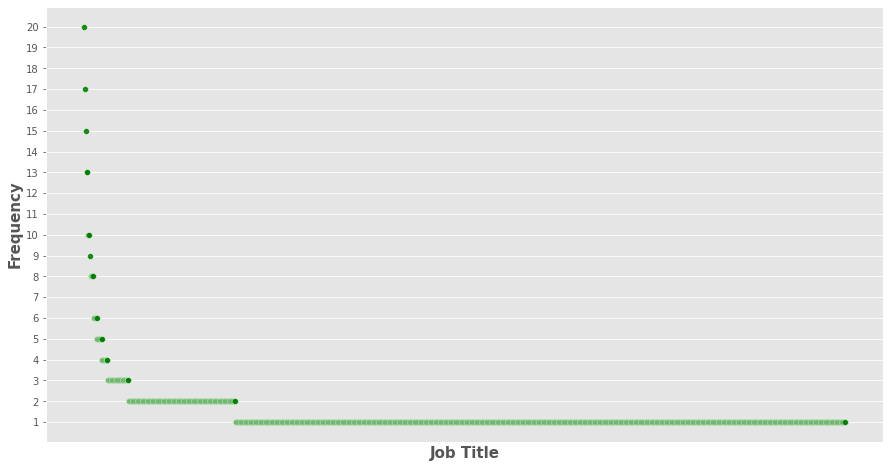

In [628]:
# Visual exploration of the Job variable
fig, ax = plt.subplots(figsize = (15, 8))
sns.scatterplot(x = df_base['Job'].unique(), y= df_base['Job'].value_counts(), color="Green", alpha = 0.9)
plt.xticks([])
plt.yticks(list(range(1,21)))
plt.xlabel('Job Title', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.show()

The plot above shows that the largest part of the job titles retrieved from the web scraping are **unique values**. Thus, this suggests that the job titles variable is fairly inconsistent and/or it exhibits a lot of other positions which are not of interest for this study.

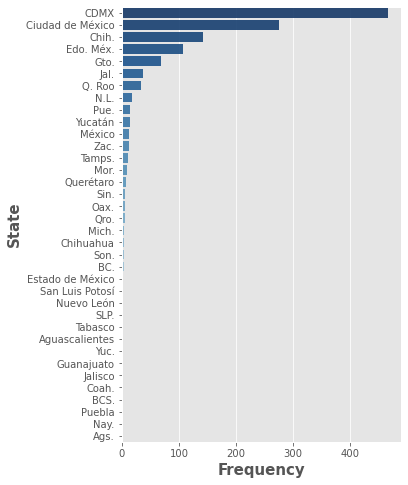

In [629]:
# Visual exploration of the Location variable
fig, ax = plt.subplots(figsize = (5, 8))
sns.barplot(x = df_base['Location'].value_counts(), y= df_base['Location'].unique(), palette="Blues_r", alpha = 0.9)
plt.xlabel('Frequency', fontsize=15, fontweight='bold')
plt.ylabel('State', fontsize=15, fontweight='bold')
plt.show()

Some states appear with its full name and some with its abbreviation. Furthermore, some states such as Ciudad de México or Estado de México appear twice or trize due to different spellings.

Notwithstanding with the above, it is clear that **Ciudad de México (Mexico City)** is the location where **the most data jobs are demanded**.

In [630]:
# Value counts for each company
df_base['Company'].value_counts()

Banamex                                  250
Grupo Salinas                             37
UVI TECH SAPI DE CV                       23
Softtek                                   22
BBVA Bancomer                             17
                                        ... 
FACTOR X CHATBOT FACTORY SC                1
Proveedora de Seguridad Industrial...      1
Probiomed, S.A. de C.V.                    1
Grupo Comrap Administraciones              1
Servicios y Productos Empresariale...      1
Name: Company, Length: 423, dtype: int64

By far, **_Banamex_** is the company with **the highest number of data jobs vacancies**. It is followed by **_Grupo Salinas_**, **_UVI TECH SAPI DE CV_** and **_Softtek_**.

C:\Users\DanielEduardo.Eduardo\AppData\Local\Temp\ipykernel_9888\768674578.py:4: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


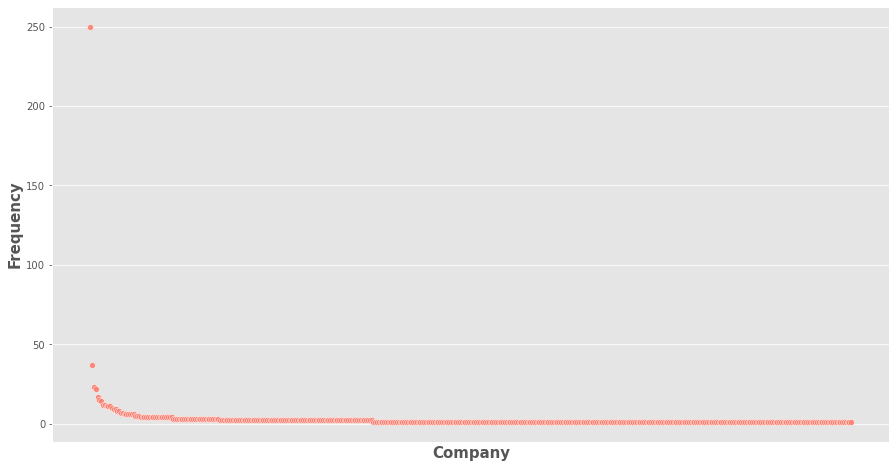

In [631]:
# Visual exploration of the Company variable
fig, ax = plt.subplots(figsize = (15, 8))
sns.scatterplot(x = df_base['Company'].value_counts().keys(), y= df_base['Company'].value_counts(), color="Salmon", alpha = 0.9)
plt.xticks([])
plt.xlabel('Company', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.show()

The plot above shows that most companies only offer **one or two** data-related positions.

In [632]:
# Value counts for each Salary
df_base['Salary'].value_counts()

$40,000 - $50,000  Mensual    15
$30,000 - $35,000  Mensual    12
$25,000 - $28,000  Mensual    11
$30,000 - $40,000  Mensual     9
$18,000  Mensual               9
                              ..
$6,500  Mensual                1
$12,999 - $13,000  Mensual     1
$11,582  Mensual               1
$13,500 - $17,000  Mensual     1
$19,000 - $22,000  Mensual     1
Name: Salary, Length: 223, dtype: int64

Obviously, firstly is necessary to clean the data in order to get more meaningful insights regarding the salary. However, it is noteworthy that most of the published vacancies offer a salary range rather than a single value. On the other hand, the periodicity of the payment ("Mensual") must be removed from all observations.

On the other hand, it "appears" that the salary range from **40,000 MXN to 50,000 MXN** is the most common, which is probably not accurate due to the fact that the salary variable is a string instad of actual numbers.

### **2. Data Cleaning and Wrangling**
___
From the raw data obtained through web scraping, it has been noticed that much of the vacancies published lack of salary data. However, those positions without said data might be useful for assessing the geographical distribution of the data jobs in Mexico as well as identiying which companies demand more data specialists even if they have not published a proposed salary.

In this context, two datasets were built:
1. One without salary data.
2. One with positions with fully disclosed salary information.

Thus, the base dataset was cleaned as a whole (dataset 1) and, then, the observations without salary data were dropped (dataset 2).

In [633]:
# First, let's make a copy of the data frame
df = df_base.copy()

In [634]:
# Drop of duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 0 to 1278
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       1098 non-null   object
 1   Salary    433 non-null    object
 2   Company   959 non-null    object
 3   Location  1098 non-null   object
dtypes: object(4)
memory usage: 42.9+ KB


#### **2.1 Cleaning of the variable 'Job'**

This section shows the process carried out to harmonize the job titles of the data-related positions and the drop of non data-related jobs.

In [635]:
# Creating job dictionary
job_dict = {
    ('data', 'analyst'): "Data Analyst",
    ('analista', 'datos'): "Data Analyst",

    ('data', 'scientist'): "Data Scientist",
    ('científico', 'datos'): "Data Scientist",
    ('cientifico', 'datos'): "Data Scientist",

    ('data', 'engineer'): "Data Engineer",
    ('ingeniero', 'datos'): "Data Engineer",

    ('business', 'analyst'): "Business Analyst",
    ('analista', 'negocio'): "Business Analyst",
    
    ('data', 'architect'): "Data Architect",
    ('arquitecto', 'datos'): "Data Architect"
}

In [636]:
# Proof of concept
list(job_dict.keys())[0][0] in 'data analyst' and list(job_dict.keys())[0][1] in 'data analyst'

True

In [637]:
# Conversion of job observations to lower case
df['Job'] = df['Job'].str.casefold()

In [638]:
# Cleaning of the variable Job
for i in range(len(job_dict)):
    df['Job'] = df['Job'].map(lambda x: list(job_dict.values())[i] if (list(job_dict.keys())[i][0] in x and list(job_dict.keys())[i][1] in x) else x)

df.head(10)

,Job,Salary,Company,Location
0,Data Analyst,"$47,000 - $53,000 Mensual",P3 IMPULSORES ESTRATEGICOS,CDMX
1,Data Analyst,"$35,000 Mensual",Corporativo Mek de México,Ciudad de México
2,Data Analyst,NaN,FIDELITY MARKETING S.A DE C.V,CDMX
3,Data Analyst,"$13,000 - $13,300 Mensual",Universidad Tecnológica de México,Ciudad de México
4,Data Analyst,NaN,Laboratorios Médicos del Chopo,CDMX
5,Data Analyst,"$8,500 - $9,000 Mensual",Conduent de México SA de CV,Chih.
6,Data Analyst,NaN,Banamex,CDMX
7,Data Analyst,"$7,500 - $8,500 Mensual",Grupo Comercial Control,Edo. Méx.​
8,Data Analyst,"$7,000 - $8,000 Mensual","Ediciones Larousse, S.A. de C.V.",CDMX
9,Data Analyst,"$12,000 Mensual",Auto Líneas América,Gto.


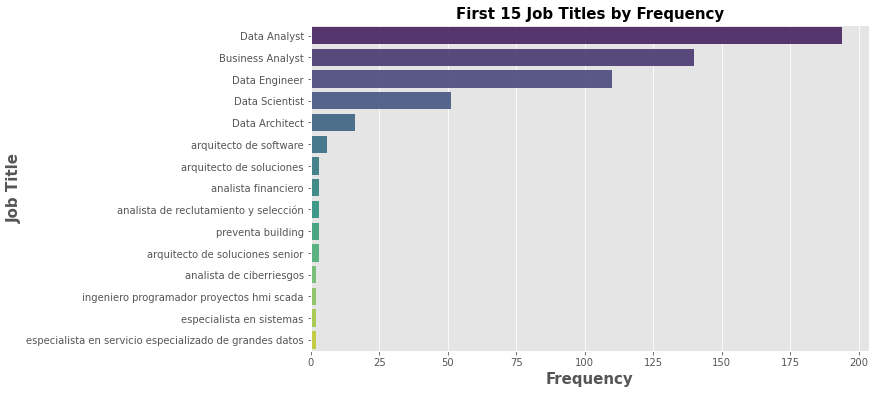

In [639]:
# Visual exploration of the pre-cleaned Job variable (first 15 positions)
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(x = df['Job'].value_counts()[:15], y= df['Job'].value_counts().keys()[:15], palette="viridis", alpha = 0.9)
plt.title('First 15 Job Titles by Frequency', fontsize=15, fontweight='bold')
plt.xlabel('Frequency', fontsize=15, fontweight='bold')
plt.ylabel('Job Title', fontsize=15, fontweight='bold')
plt.show()


In the plot above it is possible to observe:
1. The job titles for the data-related positions have been successfully harmonized and they conform the majority of the observations in the dataset
2. Along with the data positions, there is significant number of other non data-related positions. So, the latter will be removed from the dataset.

In [640]:
# Drop of observations not corresponding to Data Jobs
df = df.loc[(df['Job'] == 'Data Analyst') | (df['Job'] == 'Business Analyst') | (df['Job'] == 'Data Engineer') | (df['Job'] == 'Data Scientist') | (df['Job'] == 'Data Architect')]
df['Job'].value_counts()

Data Analyst        194
Business Analyst    140
Data Engineer       110
Data Scientist       51
Data Architect       16
Name: Job, dtype: int64

In [641]:
# Resulting number of observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 1243
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       511 non-null    object
 1   Salary    221 non-null    object
 2   Company   445 non-null    object
 3   Location  511 non-null    object
dtypes: object(4)
memory usage: 20.0+ KB


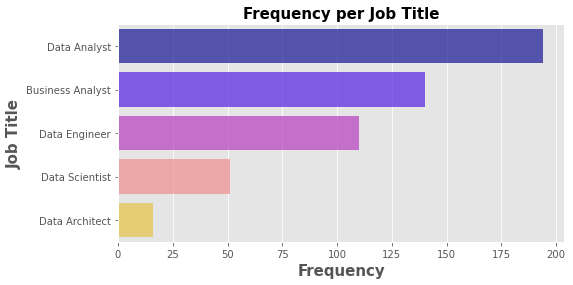

In [642]:
# Visual exploration of the cleaned Job variable (first 15 positions)
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(x = df['Job'].value_counts()[:15], y= df['Job'].value_counts().keys()[:15], palette="gnuplot2", alpha = 0.7)
plt.title('Frequency per Job Title', fontsize=15, fontweight='bold')
plt.xlabel('Frequency', fontsize=15, fontweight='bold')
plt.ylabel('Job Title', fontsize=15, fontweight='bold')
plt.show()

From the plot above, it is possible to see that the variable **Job**  has been successfully cleaned as data-related jobs are the only observations in the data set and their job titles are consistent.

#### **2.2 Cleaning of the variable 'Company'**

This section shows the process carried out to provide consistency to the letter case in the company names of the retrieved data.

In [643]:
# Cleaning of the Company variable
df = df.dropna(subset = 'Company')
df['Company'] = df['Company'].map(lambda x: str.title(str(x)))
df.head(10)

,Job,Salary,Company,Location
0,Data Analyst,"$47,000 - $53,000 Mensual",P3 Impulsores Estrategicos,CDMX
1,Data Analyst,"$35,000 Mensual",Corporativo Mek De México,Ciudad de México
2,Data Analyst,NaN,Fidelity Marketing S.A De C.V,CDMX
3,Data Analyst,"$13,000 - $13,300 Mensual",Universidad Tecnológica De México,Ciudad de México
4,Data Analyst,NaN,Laboratorios Médicos Del Chopo,CDMX
5,Data Analyst,"$8,500 - $9,000 Mensual",Conduent De México Sa De Cv,Chih.
6,Data Analyst,NaN,Banamex,CDMX
7,Data Analyst,"$7,500 - $8,500 Mensual",Grupo Comercial Control,Edo. Méx.​
8,Data Analyst,"$7,000 - $8,000 Mensual","Ediciones Larousse, S.A. De C.V.",CDMX
9,Data Analyst,"$12,000 Mensual",Auto Líneas América,Gto.


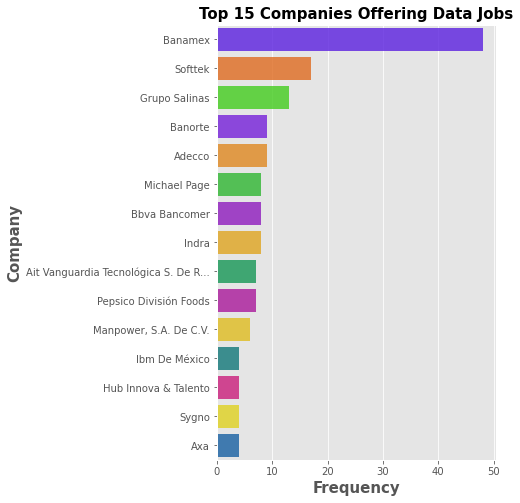

In [644]:
# Visual exploration of the cleaned Company variable
fig, ax = plt.subplots(figsize = (5, 8))
sns.barplot(x = df['Company'].value_counts()[:15], y= df['Company'].value_counts().keys()[:15], palette="prism_r", alpha = 0.8)
plt.title('Top 15 Companies Offering Data Jobs', fontsize=15, fontweight='bold')
plt.xlabel('Frequency', fontsize=15, fontweight='bold')
plt.ylabel('Company', fontsize=15, fontweight='bold')
plt.show()

The plot above suggests that the letter case of the different company names is now consistent. So, it is deemed that the variable **Company** has been successfully cleaned.

#### **2.3 Cleaning of the variable 'Location'**

This section shows the process carried out to harmonize the name of the Mexican States in which the data-related positions are demanded.

In [645]:
# Dictionary with the retrieved Location values
location_dict = {
    'CDMX': 'Ciudad de México',
    'Chih.': 'Chihuahua',
    'Edo. Méx.​': 'Estado de México',
    'Gto.': 'Guanajuato',
    'Jal.': 'Jalisco',
    'Q. Roo': 'Quintana Roo',
    'N. L.': 'Nuevo León',
    'N.L.': 'Nuevo León',
    'Pue.': 'Puebla',
    'México': 'Estado de México',
    'Zac.': 'Zacatecas',
    'Tamps.': 'Tamaulipas',
    'Mor.': 'Morelos',
    'Sin.': 'Sinaloa',
    'Oax.': 'Oaxaca',
    'Qro.': 'Querétaro',
    'Mich.': 'Michoacán',
    'Son.': 'Sonora',
    'BC.': 'Baja California',
    'SLP.': 'San Luis Potosí',
    'Yuc.': 'Yucatán',
    'Coah.': 'Coahuila',
    'BCS.': 'Baja California Sur',
    'Nay.': 'Nayarit',
    'Ags.': 'Aguascalientes'
    }

In [646]:
# Cleaning of the Location variable in the dataset
for i in range(len(location_dict)):
  df['Location'] = df['Location'].map(lambda x: list(location_dict.values())[i] if x == list(location_dict.keys())[i] else x)

df.head(10)

,Job,Salary,Company,Location
0,Data Analyst,"$47,000 - $53,000 Mensual",P3 Impulsores Estrategicos,Ciudad de México
1,Data Analyst,"$35,000 Mensual",Corporativo Mek De México,Ciudad de México
2,Data Analyst,NaN,Fidelity Marketing S.A De C.V,Ciudad de México
3,Data Analyst,"$13,000 - $13,300 Mensual",Universidad Tecnológica De México,Ciudad de México
4,Data Analyst,NaN,Laboratorios Médicos Del Chopo,Ciudad de México
5,Data Analyst,"$8,500 - $9,000 Mensual",Conduent De México Sa De Cv,Chihuahua
6,Data Analyst,NaN,Banamex,Ciudad de México
7,Data Analyst,"$7,500 - $8,500 Mensual",Grupo Comercial Control,Estado de México
8,Data Analyst,"$7,000 - $8,000 Mensual","Ediciones Larousse, S.A. De C.V.",Ciudad de México
9,Data Analyst,"$12,000 Mensual",Auto Líneas América,Guanajuato


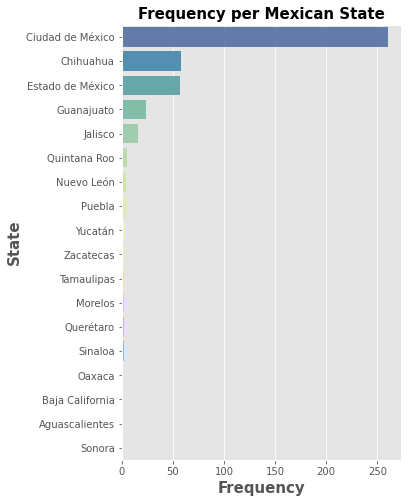

In [647]:
# Visual exploration of the cleaned Location variable
fig, ax = plt.subplots(figsize = (5, 8))
sns.barplot(x = df['Location'].value_counts(), y= df['Location'].unique(), palette="Spectral_r", alpha = 0.9)
plt.title('Frequency per Mexican State', fontsize=15, fontweight='bold')
plt.xlabel('Frequency', fontsize=15, fontweight='bold')
plt.ylabel('State', fontsize=15, fontweight='bold')
plt.show()


The plot above shows that the names of the Mexican states where the data job vacancies are demanded is now consistent. So, the variable **Location** has been successfully cleaned.

#### **2.4 Cleaning of the variable 'Salary'**

This section shows the process carried out to wrangle and clean the salary data. To do so, the salary observations were cleaned from useless characters, then, the salary ranges were splitted into two columns and a average salary was calculated when applicable. Finally, non useful Salary columns were dropped.

In [648]:
# Checking if all the Salary observations are disclosed in a monthly basis
df[df['Salary'].map(lambda x: True if ('Mensual' not in str(x)) and (x is not np.nan) else False)]

,Job,Salary,Company,Location
745,Data Engineer,"$10,000 - $12,000 Anual",Here,Guanajuato
762,Data Engineer,"$10,000 - $12,000 Anual",Teradata,Baja California
776,Data Engineer,"$10,000 - $12,000 Anual",Teradata,Estado de México


The above results suggest that the offered "annual" salary is way **too low** to be an accurate figure. So, most likely, it is a clerical mistake at the moment of publishing the vacancies on the website. Thus, such observations will be taken as monthly salaries for the purposes of the present study.

In [649]:
# Cleaning of the Salary variable

# Removing useless characters from column values
char_remove = {
                'Anual': '',
                'Mensual': '',
                '$': '',
                ',': ''}

for key, value in char_remove.items():
    df['Salary'] = df['Salary'].str.replace(key, value).str.strip()

# Splitting Salary column values into two columns
df[['Min Salary', 'Max Salary']] = df['Salary'].str.split('-', 1, expand=True)
df['Min Salary'] = df['Min Salary'].str.strip().astype(np.float64)
df['Max Salary'] = df['Max Salary'].str.strip().astype(np.float64)

# Calculating Average Salary
df['Average Salary'] = (df['Min Salary'] + df['Max Salary'])/2 if df['Max Salary'] is not None else df['Min Salary']

# Dropping other Salary columns
df = df.drop(axis = 1, columns= ['Salary', 'Min Salary', 'Max Salary']) 

df.head(10)

C:\Users\DanielEduardo.Eduardo\AppData\Local\Temp\ipykernel_9888\337619802.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace(key, value).str.strip()


,Job,Company,Location,Average Salary
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0
1,Data Analyst,Corporativo Mek De México,Ciudad de México,NaN
2,Data Analyst,Fidelity Marketing S.A De C.V,Ciudad de México,NaN
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0
4,Data Analyst,Laboratorios Médicos Del Chopo,Ciudad de México,NaN
5,Data Analyst,Conduent De México Sa De Cv,Chihuahua,8750.0
6,Data Analyst,Banamex,Ciudad de México,NaN
7,Data Analyst,Grupo Comercial Control,Estado de México,8000.0
8,Data Analyst,"Ediciones Larousse, S.A. De C.V.",Ciudad de México,7500.0
9,Data Analyst,Auto Líneas América,Guanajuato,NaN


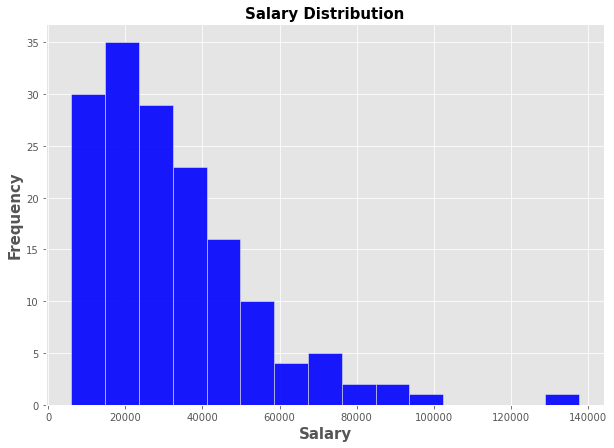

In [650]:
# Visual exploration of the cleaned Salary variable
fig, ax = plt.subplots(figsize = (10, 7))
sns.histplot(data= df['Average Salary'], color = 'Blue', alpha = 0.9)
plt.title('Salary Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Salary', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.show()

 The histogram above suggests that all Salary observations have been transformed from a range in a string format into actual numbers. So, it is considered that the variable **Salary** has been successfully cleaned. On the other hand, it is noteworthy that some observations fall well beyond the main salary distribution. Let's take a look into those observations.

In [651]:
df[df['Average Salary'] > 120000]

,Job,Company,Location,Average Salary
202,Data Analyst,Starkejobs Sc,Estado de México,137500.0


From the above results, it is inconsistent that a Data Analyst position earns an extremely high salary as the one showed. On the contrary, Data Analyst positions tend to be entry-level positions in the data-related jobs structure as they require less math and programming skills in comparison to Data Scientists or Data Engineers. 

On the other hand, it is notable that this result only correspond to a single observation. So, this tuple can be classified as an outlier and, in order to provide with **more accuracy to the subsequent analysis**, this observation was removed from the dataset.  

In [652]:
df = df[df['Average Salary'] < 120000]

#### **2.5 Exportation of the cleaned datasets**

This section shows the process for exporting the two desired datasets as well as creating the second dataset with only fully disclosed salary data.

In [653]:
# Exporting of first dataset with the whole Geographical and Company data 
df.to_csv('DataSet_Clean_Geo.csv', index=False, encoding='utf-8')

In [654]:
# Creation of the second dataframe
df2 = df.copy()
df2.head(10)

,Job,Company,Location,Average Salary
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0
5,Data Analyst,Conduent De México Sa De Cv,Chihuahua,8750.0
7,Data Analyst,Grupo Comercial Control,Estado de México,8000.0
8,Data Analyst,"Ediciones Larousse, S.A. De C.V.",Ciudad de México,7500.0
10,Data Analyst,Gepp,Jalisco,9925.0
11,Data Analyst,Jeltm Asesores Fiscales,Ciudad de México,21000.0
12,Data Analyst,Adecco,Estado de México,26500.0
14,Data Analyst,Kukulcan Express Sa De Cv,Quintana Roo,11000.0
17,Data Analyst,Encontrack Sa De Cv,Ciudad de México,17500.0


In [655]:
# Drop of null Salary values
df2 = df2.dropna(subset = 'Average Salary')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 1238
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             157 non-null    object 
 1   Company         157 non-null    object 
 2   Location        157 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.1+ KB


In [656]:
df2.head()

,Job,Company,Location,Average Salary
0,Data Analyst,P3 Impulsores Estrategicos,Ciudad de México,50000.0
3,Data Analyst,Universidad Tecnológica De México,Ciudad de México,13150.0
5,Data Analyst,Conduent De México Sa De Cv,Chihuahua,8750.0
7,Data Analyst,Grupo Comercial Control,Estado de México,8000.0
8,Data Analyst,"Ediciones Larousse, S.A. De C.V.",Ciudad de México,7500.0


In [657]:
# Exporting of second dataset with the only disclosed Salary data 
df.to_csv('DataSet_Clean_Salary.csv', index=False, encoding='utf-8')